# <center> Machine Learning - Shahid Beheshti University, 2022 <center> 
### <center> Homework No.2 <center> 
    
<center> Mostafa Kavakebi - 96235042<center>

#Import Libraries

<div dir=rtl>
<font face="B Nazanin">

در ابتدا کتابخانه‌های ضروری را فراخوانی می‌کنیم.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

# Part_1
---
#Mobile Price Dataset

## pre-processing

<div dir=rtl>
<font face="B Nazanin">

ابتدا دو دیتاست ترین و تست را بارگذاری و تعریف کرده و سپس یک بررسی اولیه انجام می‌دهیم تا اگر نیازی به پیش پردازش و یا تمیز کردن دیتا بود، کارهای لازم را انجام دهیم.

In [2]:
mobile_train_data = pd.read_csv('train.csv')

In [3]:
mobile_train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
mobile_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_test_data = pd.read_csv('test.csv')

In [6]:
mobile_test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [7]:
mobile_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

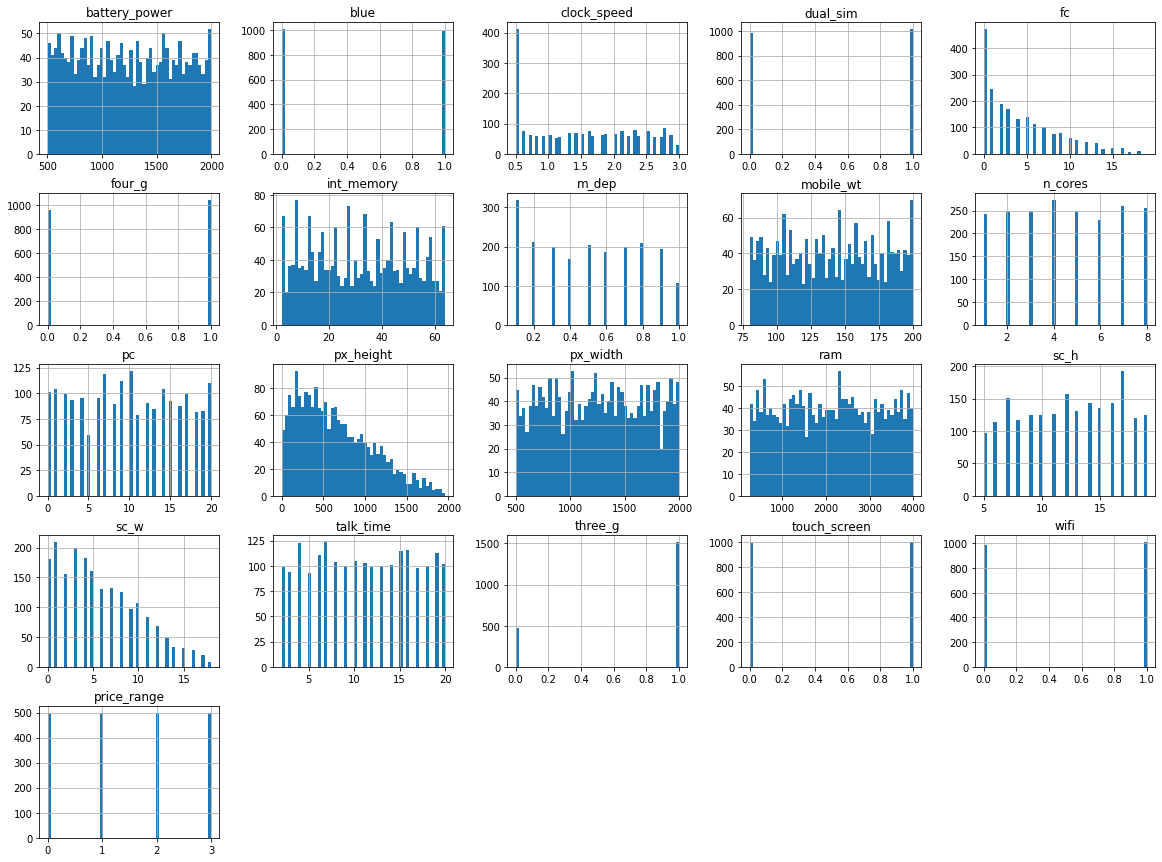

In [8]:
mobile_train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix = mobile_train_data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [10]:
cr = corr_matrix['price_range'].copy()
cr

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<div dir=rtl>
<font face="B Nazanin">

دیتای ما شامل 21 ستون می‌باشد که هیچ مقدار missing-value ندارد و همچنین تمام ستون‌ها از نوع عددی می‌باشند و هیچ مقدار رشته‌ای نداریم، نتیجتا دیتای ما نیاز به پیش‌پردازش به‌خصوصی ندارد.

اما دیتای تست با دیتای ترین یکسان نیست و اگر که مثلا ما رنج قیمت را به عنوان تارگت مساله در نظر بگیریم، در آزمایش کردن مدلی که برای هدف مساله‌ی خود ساخته‌ایم، چیزی در اختیار نداریم چرا که در دیتای تست این ستون وجود ندارد. پس در ادامه بیست درصد از دیتای ترین را به عنوان تست در نظر خواهیم گرفت.

همچنین مشاهده می‌شود که رم و قدرت باطری بیشتر ارتباط را با رنج قیمت دارند.

## Task_1

<div dir=rtl>
<font face="B Nazanin">

در «روش های انتخاب ویژگی مستقیم» (Forward Feature Selection)، ابتدا یک زیر مجموعه تهی از ویژگی‌ها ساخته می‌شود. سپس در هر مرحله، ویژگی‌هایی که بهترین عملکرد را برای مدل یادگیری به ارمغان می‌آورند، به این زیر مجموعه اضافه می‌شوند.

AUC (منطقه زیر منحنی ROC) در واقع یک روش سنجش و ارزیابی است. که یک معیار کلی از عملکرد در تمام آستانه‌های کلاسیفیکیشن ممکن را ارائه می دهد.

این روش سنجش در کتابخانه‌ی sklearn.metrics تحت عنوان roc_auc_score وجود دارد و قابل استفاده است. اما ما در اینجا قصد نداریم از این پکیج استفاده کنیم.

In [ ]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in mobile_train_data:
  
    # Add the variable
    variables_evaluate.append(mobile_train_data[v])
    
    # Append the values to the lists
    auc_values_train.append(mobile_train_data[v])
    auc_values_test.append(mobile_train_data[v])
    
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables_evaluate, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

## Task_2

<div dir=rtl>
<font face="B Nazanin">

در این قسمت قصد داریم که با استفاده از پکیج‌های موجود یک رگرسیون لجستیک برای پیش‌بینی پارامتر هدف با استفاده از فیچرهای گزینش شده طراحی کنیم و در نهایت میزان صحت آن را با معیار های precision ، recall ، f-score و همچنین ماتریس آشفتگی نشان بدهیم.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train_set, test_set = train_test_split(mobile_train_data, test_size = 0.2, random_state = 42)

In [12]:
x_train = train_set[['ram']].copy()
y_train = train_set[['price_range']].copy()

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Text(42.0, 0.5, 'Truth')

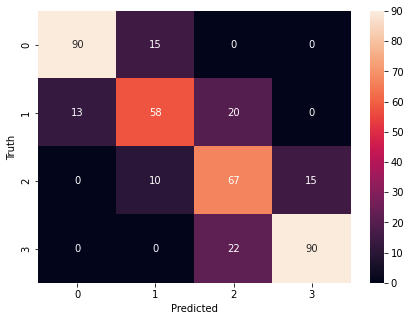

In [13]:
y_pred = logisticRegr.predict(test_set[['ram']].copy())
cm = confusion_matrix(test_set[['price_range']].copy(), y_pred)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
print(classification_report(test_set[['price_range']].copy(), y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.70      0.64      0.67        91
           2       0.61      0.73      0.67        92
           3       0.86      0.80      0.83       112

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



<div dir=rtl>
<font face="B Nazanin">

میزان صحت و درستی رگرسیون ما برای پیش‌بینی تارگت رنج قیمت با استفاده از فیچر رم چیزی در حدود 76 درصد شده است که با توجه به ابعاد دیتا میزان قابل قبولی می‌باشد.

## Task_3

<div dir=rtl>
<font face="B Nazanin">

تحلیل مولفه اساسی (PCA) یا (Principal Component Analysis) یک «روش تبدیل خطی» (Linear Transformation Technique) ساده و در عین حال محبوب و کارآمد محسوب می‌شود.

تحلیل مولفه اساسی (PCA) قصد دارد همبستگی بین متغیرها را شناسایی کند. اگر یک همبستگی قوی بین متغیرها وجود داشت، تلاش‌ها برای کاهش ابعاد معنادار خواهد بود. به طور کل، آنچه در PCA به وقوع می‌پیوندد پیدا کردن جهت واریانس بیشینه در داده‌های ابعاد بالا و طرح‌ریزی کردن آن در زیرفضایی با ابعاد کمتر به طوری است که بیشترین اطلاعات حفظ شوند.

<div dir=rtl>
<font face="B Nazanin">

ابتدا دیتا را کپی کرده و در mobile_train_data_pca ذخیره می‌کنیم، تا اگر به دیتای قبلی نیاز پیدا کردیم به مشکل نخوریم و از بین نرفته باشد.

In [15]:
mobile_train_data_pca = mobile_train_data.copy()

<div dir=rtl>
<font face="B Nazanin">

بسیار اهمیت دارد که قبل از استفاده از الگوریتم PCA دیتاها را استاندارد و اسکیل کرده باشیم تا PCA ما دچار مشکل نشود و به درستی عمل کند.

بدین منظور از اسکیلرهای موجود در sklearn استفاده می‌کنیم.

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(mobile_train_data_pca)

StandardScaler()

In [17]:
scaled_data=scaler.transform(mobile_train_data_pca)
scaled_data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -0.4472136 ],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  1.34164079],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -1.34164079],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664,  1.34164079]])

<div dir=rtl>
<font face="B Nazanin">

برای پیاده‌سازی PCA از sklrean استفاده می‌کنیم.

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=2)

In [20]:
pca.fit(scaled_data)

PCA(n_components=2)

In [21]:
x_pca=pca.transform(scaled_data)

In [22]:
scaled_data.shape

(2000, 21)

In [23]:
x_pca.shape

(2000, 2)

In [24]:
scaled_data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -0.4472136 ],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  1.34164079],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -1.34164079],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664,  1.34164079]])

In [25]:
x_pca

array([[-1.14223734,  0.17781543],
       [ 1.04386056, -1.94374205],
       [ 0.75254335, -1.27660758],
       ...,
       [ 1.62117156, -1.22320266],
       [-1.70429419, -1.25501116],
       [ 1.70606144,  0.10556599]])

Text(0, 0.5, 'Second principle component')

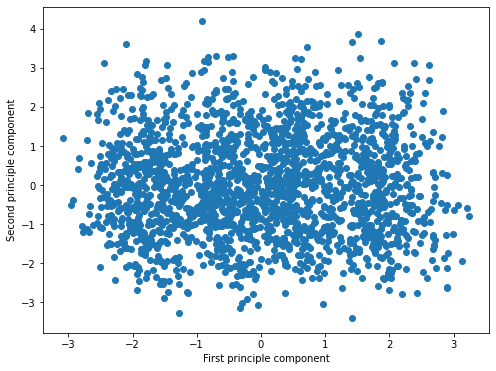

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Task_4

In [27]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()


df1 = lab_enc.fit_transform(x_pca[:,0])
df2 = lab_enc.fit_transform(x_pca[:,1])
df3 = lab_enc.fit_transform(scaled_data[:,20])

dataeeee = {'First principle component': df1,
        'Second principle component': df2,
        'Price Range': df3
        }

dftask4 = pd.DataFrame(dataeeee)
dftask4

,First principle component,Second principle component,Price Range
0,514,1145,1
1,1472,119,2
2,1372,337,2
3,1452,426,2
4,886,1771,1
...,...,...,...
1995,469,525,0
1996,1416,279,2
1997,1660,363,3
1998,306,344,0


In [28]:
df_train_set, df_test_set = train_test_split(dftask4, test_size = 0.2, random_state = 42)

In [29]:
x_trainTASK4 = df_train_set[['First principle component', 'Second principle component']].copy()
y_trainTASK4 = df_train_set[['Price Range']].copy()

logisticRegrTASK4 = LogisticRegression()
logisticRegrTASK4.fit(x_trainTASK4, y_trainTASK4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Text(42.0, 0.5, 'Truth')

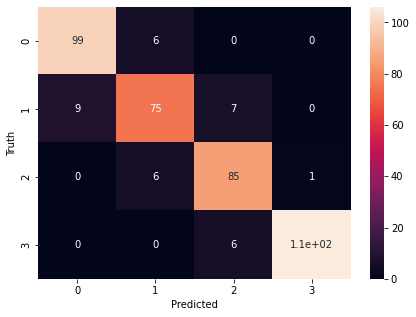

In [30]:
y_pred = logisticRegrTASK4.predict(df_test_set[['First principle component', 'Second principle component']].copy())
cm = confusion_matrix(df_test_set[['Price Range']].copy(), y_pred)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
print(classification_report(df_test_set[['Price Range']].copy(), y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.86      0.82      0.84        91
           2       0.87      0.92      0.89        92
           3       0.99      0.95      0.97       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Task_6_A

In [32]:
mobile_train_data_AAA = mobile_train_data.copy()

<div dir=rtl>
<font face="B Nazanin">

Binning تکنیکی است که دقیقاً همان چیزی را که به نظر می رسد انجام می دهد. ستونی با اعداد پیوسته می گیرد و اعداد را بر اساس محدوده هایی که ما تعیین می کنیم در "bins" قرار می دهد. این به ما یک ویژگی متغیر طبقه بندی جدید می دهد.

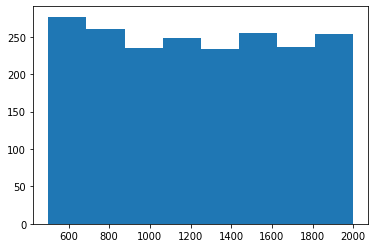

In [33]:
mbps = mobile_train_data['battery_power']
plt.hist(mbps, bins=8)
plt.show()

<div dir=rtl>
<font face="B Nazanin">

مشاهده می‌شود که ما 8 بین با دامنه های -600 , 600-800 , 800-1000 , ... , 1800-2000 داریم.

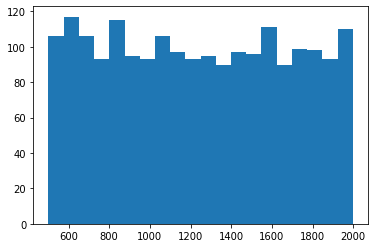

In [34]:
plt.hist(mbps, bins=20)
plt.show()

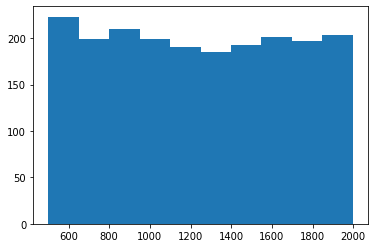

In [35]:
plt.hist(mbps, bins=10)
plt.show()

<div dir=rtl>
<font face="B Nazanin">

اکنون که محدوده‌های bin های خود را می‌دانیم، می‌توانیم از عملکرد برش pandas استفاده می‌کند. Cut با استفاده از نام‌های برچسب و محدوده‌هایی که ارائه می‌کنیم، ستون ما را تقسیم می‌کند.

In [36]:
bins = [0, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = [1,2,3,4,5,6,7,8]
mobile_train_data_AAA['binned'] = pd.cut(mobile_train_data['battery_power'], bins=bins, labels=labels)
mobile_train_data_AAA

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,binned
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,3
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,4
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,8
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,8
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,6


## Task_6_B

<div dir=rtl>
<font face="B Nazanin">

One Hot Encoding روشی متداول برای پیش پردازش ویژگی های طبقه بندی شده برای مدل های یادگیری ماشینی است. این نوع رمزگذاری یک ویژگی باینری جدید برای هر دسته ممکن ایجاد می کند و مقدار 1 را به ویژگی هر نمونه که با دسته اصلی آن مطابقت دارد اختصاص می دهد.

One hot Encoding داده‌های Ttraining ما را مفیدتر و گویاتر می‌کند و می‌توان آن را به راحتی تغییر مقیاس داد. با استفاده از مقادیر عددی، ما به راحتی احتمالی را برای مقادیر خود تعیین می کنیم. به طور خاص، One hot Encoding برای مقادیر خروجی ما استفاده می شود، زیرا پیش بینی های ظریف تری را نسبت به برچسب های منفرد ارائه می دهد.

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df_dual_sim = pd.DataFrame(encoder.fit_transform(mobile_train_data[['dual_sim']]).toarray())
encoder_df_dual_sim

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1995,0.0,1.0
1996,0.0,1.0
1997,0.0,1.0
1998,1.0,0.0


In [38]:
encoder_df_blue = pd.DataFrame(encoder.fit_transform(mobile_train_data[['blue']]).toarray())
encoder_df_blue

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1995,0.0,1.0
1996,0.0,1.0
1997,1.0,0.0
1998,1.0,0.0


In [39]:
encoder_df_fc = pd.DataFrame(encoder.fit_transform(mobile_train_data[['fc']]).toarray())
encoder_df_fc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
encoder_df_four_g = pd.DataFrame(encoder.fit_transform(mobile_train_data[['four_g']]).toarray())
encoder_df_four_g

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1995,0.0,1.0
1996,1.0,0.0
1997,0.0,1.0
1998,0.0,1.0


In [41]:
mobile_train_data_BBB = mobile_train_data.copy()
BBB1 = encoder_df_four_g
mobile_train_data_BBB = mobile_train_data_BBB.join(BBB1)
mobile_train_data_BBB

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,0,1
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,1.0,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,0.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,1.0,0.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,0.0,1.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,1.0,0.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,0.0,1.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,0.0,1.0


## Task_6_C

<div dir=rtl>
<font face="B Nazanin">

تبدیل log، مسلماً، محبوب‌ترین در میان انواع مختلف تبدیل‌های مورد استفاده برای تبدیل داده‌های کج‌شده به انطباق تقریباً با نرمال است. اگر داده های اصلی از یک توزیع log-normal یا تقریباً مشابه پیروی کنند، آنگاه داده های تبدیل شده با log از توزیع نرمال یا نزدیک به نرمال پیروی می کنند.

توزیع فیچرهای مختلف را در پایین مشاهده می‌کنیم.

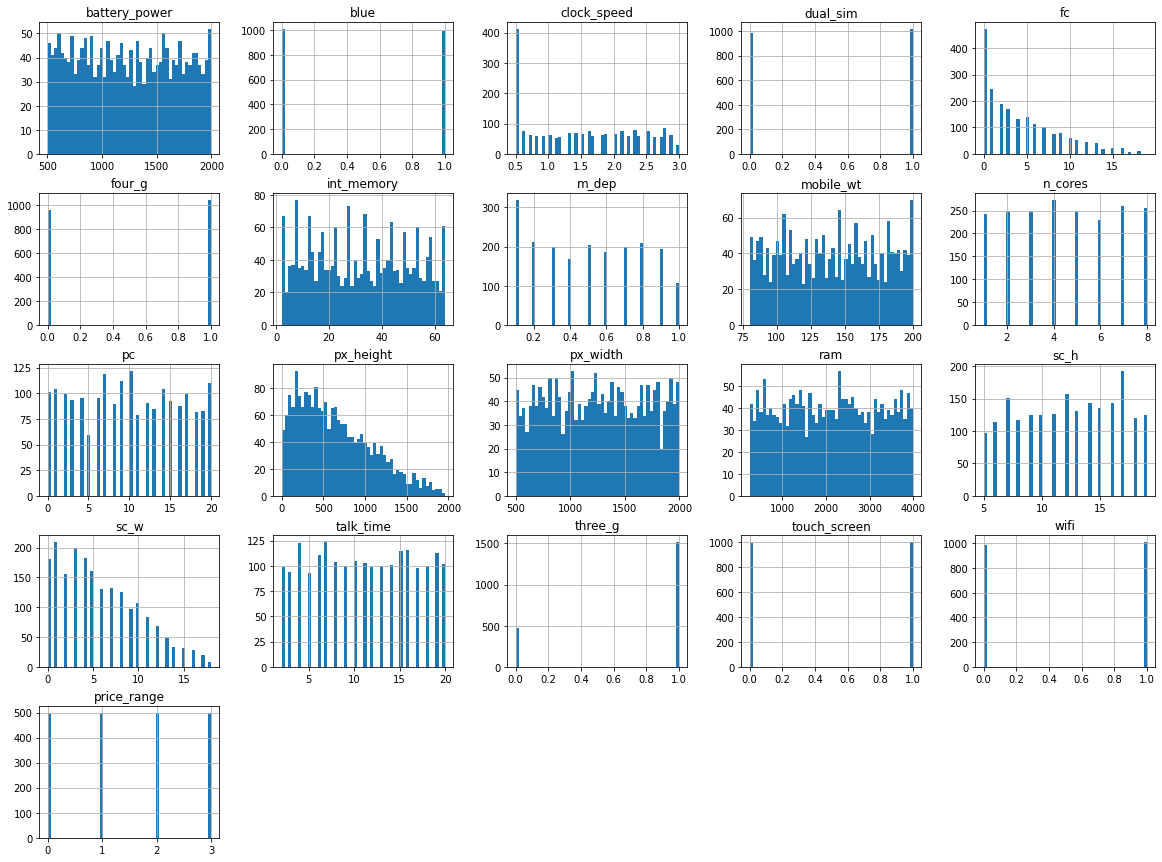

In [42]:
mobile_train_data.hist(bins=50, figsize=(20,15))
plt.show()

<div dir=rtl>
<font face="B Nazanin">

همانطور که مشاهده می‌شود برای بعضی از فیچرها مناسب و برای برخی نمی‌باشد، مثلا برای px_height تبدیل مناسبی است اما برای three_g نه.

## Task_6_D

<div dir=rtl>
<font face="B Nazanin">

دو ستون جدید برای مساحت و حجم ایجاد می‌کنیم.

In [43]:
#m_dep : Mobile Depth in cm
mobile_train_data_DDD = mobile_train_data.copy()

mobile_train_data_DDD['volume cm'] = mobile_train_data['m_dep']*mobile_train_data['px_height']*mobile_train_data['px_width']*0.0264583333*0.0264583333
mobile_train_data_DDD['Area px'] = mobile_train_data['px_height']*mobile_train_data['px_width']
mobile_train_data_DDD[['m_dep', 'px_height', 'px_width', 'Area px', 'volume cm']]

,m_dep,px_height,px_width,Area px,volume cm
0,0.6,20,756,15120,6.350794
1,0.7,905,1988,1799140,881.633259
2,0.9,1263,1716,2167308,1365.488697
3,0.8,1216,1786,2171776,1216.269966
4,0.6,1208,1212,1464096,614.958446
...,...,...,...,...,...
1995,0.8,1222,1890,2309580,1293.444990
1996,0.2,915,1965,1797975,251.732107
1997,0.7,868,1632,1416576,694.165277
1998,0.1,336,670,225120,15.759377


## Task_7

In [44]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)

### Task_7_1

In [45]:
train_set_AAA, test_set_AAA = train_test_split(mobile_train_data_AAA, test_size = 0.2, random_state = 42)

In [46]:
SVM.fit(train_set_AAA.loc[:, train_set_AAA.columns != 'price_range'], train_set_AAA[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [47]:
SVM.score(test_set_AAA.loc[:, test_set_AAA.columns != 'price_range'], test_set_AAA[['price_range']])

0.9725

### Task_7_2

In [48]:
train_set_BBB, test_set_BBB = train_test_split(mobile_train_data_BBB, test_size = 0.2, random_state = 42)

In [49]:
SVM.fit(train_set_BBB.loc[:, train_set_BBB.columns != 'price_range'], train_set_BBB[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [50]:
SVM.score(test_set_BBB.loc[:, test_set_BBB.columns != 'price_range'], test_set_BBB[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9675

### Task_7_3

<div dir=rtl>
<font face="B Nazanin">

با اضافه کردن دو ستون حجم و مساحت مدت زمان آموزش مدل SVM ما بسیار طولانی شده، برای همین اندازه‌ی دیتای تست را 95 گذاشته‌ایم. اما واضحا نتیجه را بهتر کرده‌اند.

In [51]:
train_set_DDD, test_set_DDD = train_test_split(mobile_train_data_DDD, test_size = 0.95, random_state = 42)

In [52]:
SVM.fit(train_set_DDD.loc[:, train_set_DDD.columns != 'price_range'], train_set_DDD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [53]:
SVM.score(test_set_DDD.loc[:, test_set_DDD.columns != 'price_range'], test_set_DDD[['price_range']])

0.8215789473684211

### Task_7_4

In [54]:
j1 = mobile_train_data_AAA['binned']
j2 = mobile_train_data_BBB[0]
j3 = mobile_train_data_BBB[1]
j4 = mobile_train_data_DDD['volume cm']
j5 = mobile_train_data_DDD['Area px']


mobile_train_data_ABD = mobile_train_data.copy()

mobile_train_data_ABD = mobile_train_data_ABD.join(j1)
mobile_train_data_ABD = mobile_train_data_ABD.join(j2)
mobile_train_data_ABD = mobile_train_data_ABD.join(j3)
mobile_train_data_ABD = mobile_train_data_ABD.join(j4)
mobile_train_data_ABD = mobile_train_data_ABD.join(j5)

train_set_ABD, test_set_ABD = train_test_split(mobile_train_data_ABD, test_size = 0.95, random_state = 42)

In [55]:
SVM.fit(train_set_ABD.loc[:, train_set_ABD.columns != 'price_range'], train_set_ABD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [57]:
SVM.score(test_set_ABD.loc[:, test_set_ABD.columns != 'price_range'], test_set_ABD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8215789473684211

## Task_8

<div dir=rtl>
<font face="B Nazanin">

در آمار و یادگیری ماشین، bootstrapping یک تکنیک نمونه‌گیری مجدد است که شامل کشیدن مکرر نمونه از داده‌های منبع ما با جایگزینی، اغلب برای تخمین پارامتر جمعیت است. منظور ما از "با جایگزینی" این است که یک نقطه داده ممکن است چندین بار در مجموعه داده نمونه‌گیری مجدد ما گنجانده شود.

Cross-Validation مجموعه داده های موجود را برای ایجاد مجموعه داده های متعدد تقسیم می کند و روش Bootstrapping از مجموعه داده اصلی برای ایجاد مجموعه داده های متعدد پس از نمونه گیری مجدد با جایگزینی استفاده می کند.

روش bootstrap یک تکنیک نمونه‌گیری مجدد است که برای تخمین آمار یک جمعیت با نمونه‌برداری از مجموعه داده با جایگزینی استفاده می‌شود. می توان از آن برای تخمین آماری مانند میانگین یا انحراف معیار استفاده کرد.


## Task_9

<div dir=rtl>
<font face="B Nazanin">

5x2 cross-validation نوع خاصی از cross-validation  تودرتو (nested) است. و اشاره دارد به ۵ repetition از یک 2-fold. و راهی برای به دست آوردن تخمین خوب از خطای تعمیم، و همچنین برآورد خوبی از واریانس آن خطا (به منظور انجام آزمون‌های آماری) است.

لینک زیر لینک مقاله‌ای تحت عنوان Approximate statistical tests for comparing supervised classification learning algorithms است و اهمیت این روش را بیشتر روشن می‌کند.

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.3325&rep=rep1&type=pdf

## Task_10

<div dir=rtl>
<font face="B Nazanin">

در تحلیل خوشه‌ای، روش elbow یک روش اکتشافی است که در تعیین تعداد خوشه‌ها در یک مجموعه داده استفاده می‌شود. این روش شامل ترسیم تغییرات توضیح داده شده به عنوان تابعی از تعداد خوشه ها، و انتخاب eEElbow منحنی به عنوان تعداد خوشه های مورد استفاده است.
اما روش elbow فقط یک ویژگی خوشه‌بندی جهانی را اندازه‌گیری می‌کند.

# Part_2
---
#Apartment rental offers in Germany Dataset

## pre-processing

In [114]:
immo_data = pd.read_csv('immo_data.csv')

In [115]:
immo_data

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [116]:
immo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

## Task_1

<div dir=rtl>
<font face="B Nazanin">
 
 می‌خواهیم یک مدل رگرسیون تنها با سه تا فیچرها serviceCharge و heatingType و telekomUploadSpeed طراحی کنیم.


In [209]:
reg_data = immo_data[['serviceCharge', 'heatingType', 'telekomUploadSpeed']].copy()

In [210]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       261941 non-null  float64
 1   heatingType         223994 non-null  object 
 2   telekomUploadSpeed  235492 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.2+ MB


<div dir=rtl>
<font face="B Nazanin">

همانطور که مشاهده می‌شود دیتای ما دارای مقادیر missing-value می‌باشد و همچنین فیچر heatingType از نوع object است که این رگرسیون ما را دچار مشکل می‌کند پس لازم است که ما بر روی دیتای جدید، پیش پردازش انجام دهیم و این مشکلات را برطرف کنیم. 

In [211]:
reg_data['heatingType'].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

<div dir=rtl>
<font face="B Nazanin">

ستون جدیدی تشکیل می‌دهیم و برای heatingType مقدار عددی تعیین می‌کنیم.

In [212]:
heatingType_dict = {
    "central_heating": 1,
    "district_heating": 2,
    "gas_heating": 3,
    "self_contained_central_heating": 4,
    "floor_heating": 5,
    "oil_heating" : 6,
    "heat_pump" : 7,
    "combined_heat_and_power_plant" : 8,
    "night_storage_heater" : 9,
    "wood_pellet_heating" : 10,
    "electric_heating" : 11,
    "stove_heating" : 12,
    "solar_heating" : 13
}

reg_data['heatingType ID'] = reg_data['heatingType'].map(heatingType_dict)
reg_data

,serviceCharge,heatingType,telekomUploadSpeed,heatingType ID
0,245.00,central_heating,10.0,1.0
1,134.00,self_contained_central_heating,10.0,4.0
2,255.00,floor_heating,2.4,5.0
3,58.15,district_heating,40.0,2.0
4,138.00,self_contained_central_heating,NaN,4.0
...,...,...,...,...
268845,90.00,heat_pump,10.0,7.0
268846,220.00,gas_heating,NaN,3.0
268847,220.00,central_heating,40.0,1.0
268848,175.00,heat_pump,NaN,7.0


<div dir=rtl>
<font face="B Nazanin">

در خصوص مشکل missing-value ها بهتر است که از جایگذاری آنها با میانگین و میانه و دیگر مقادیر خودداری کنیم. چرا که اولا در ستون دوم دست کم 37947 و در ستون سوم دست کم 26449 مقدار از دست رفته داریم و همچنین ستون دوم از نوع شئ می‌باشد و احتمالا جایگذاری مقادیر از دست رفته با میانه و میانگین کار ما را دچار اشکال میکند. در نتیجه ما ردیف هایی که مقادیر از دست رفته دارند را حذف می‌کنیم.

In [213]:
reg_data_dropped = reg_data.dropna()
reg_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193700 entries, 0 to 268847
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       193700 non-null  float64
 1   heatingType         193700 non-null  object 
 2   telekomUploadSpeed  193700 non-null  float64
 3   heatingType ID      193700 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.4+ MB


In [214]:
reg_data_dropped

,serviceCharge,heatingType,telekomUploadSpeed,heatingType ID
0,245.00,central_heating,10.0,1.0
1,134.00,self_contained_central_heating,10.0,4.0
2,255.00,floor_heating,2.4,5.0
3,58.15,district_heating,40.0,2.0
5,142.00,gas_heating,2.4,3.0
...,...,...,...,...
268841,98.00,central_heating,40.0,1.0
268843,120.00,central_heating,40.0,1.0
268844,80.00,gas_heating,2.4,3.0
268845,90.00,heat_pump,10.0,7.0


In [215]:
reg_data_final = reg_data_dropped[['serviceCharge', 'heatingType ID', 'telekomUploadSpeed']].copy()
reg_data_final

,serviceCharge,heatingType ID,telekomUploadSpeed
0,245.00,1.0,10.0
1,134.00,4.0,10.0
2,255.00,5.0,2.4
3,58.15,2.0,40.0
5,142.00,3.0,2.4
...,...,...,...
268841,98.00,1.0,40.0
268843,120.00,1.0,40.0
268844,80.00,3.0,2.4
268845,90.00,7.0,10.0


<div dir=rtl>
<font face="B Nazanin">

جهت آماده‌سازی داده‌ها برای رگرسیون آنها را به دو قسمت ترین و تست تقسیم می‌کنیم. یک‌پنجم داده‌ها را جهت تست در نظر می‌گیریم.

In [216]:
train_set, test_set = train_test_split(reg_data_final, test_size = 0.2, random_state = 42)

In [217]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154960 entries, 49433 to 169310
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       154960 non-null  float64
 1   heatingType ID      154960 non-null  float64
 2   telekomUploadSpeed  154960 non-null  float64
dtypes: float64(3)
memory usage: 4.7 MB


In [218]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38740 entries, 199971 to 190092
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   serviceCharge       38740 non-null  float64
 1   heatingType ID      38740 non-null  float64
 2   telekomUploadSpeed  38740 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


<div dir=rtl>
<font face="B Nazanin">

برای به دست آوردن مقدار MSE باید هرمقدار پیشبینی شده را از مقدار مشاهده شده کم کرده و به توان دو برسانیم و مجموع این تفاضلات را جمع کرده و تقسیم بر تعداد کنیم.


**<center>MSE formula = (1/n) * Σ(actual – forecast)^2<center>**

In [226]:
X = train_set[['telekomUploadSpeed']]
y = train_set[['heatingType ID']]

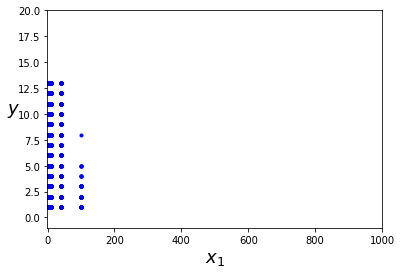

In [227]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1000, -1, 20])
plt.show()

In [228]:
X_b = np.c_[np.ones((154960 , 1)), X] 
linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [229]:
linear

array([[ 2.21898668e+00],
       [-1.52512372e-03]])

## Task_2

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_set[['telekomUploadSpeed', 'heatingType ID']], train_set['serviceCharge'])
predictionsl = lin_reg.predict(test_set[['telekomUploadSpeed', 'heatingType ID']])
lin_mse = mean_squared_error(test_set['serviceCharge'], predictionsl)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

98.26924049184314

## Task_3

### ridge

<div dir=rtl>
<font face="B Nazanin">

رگرسیون ridge روشی برای تخمین ضرایب مدل‌های رگرسیون چندگانه در سناریوهایی است که متغیرهای مستقل خطی همبستگی بالایی دارند. در بسیاری از زمینه ها از جمله اقتصاد سنجی، شیمی و مهندسی استفاده شده است.

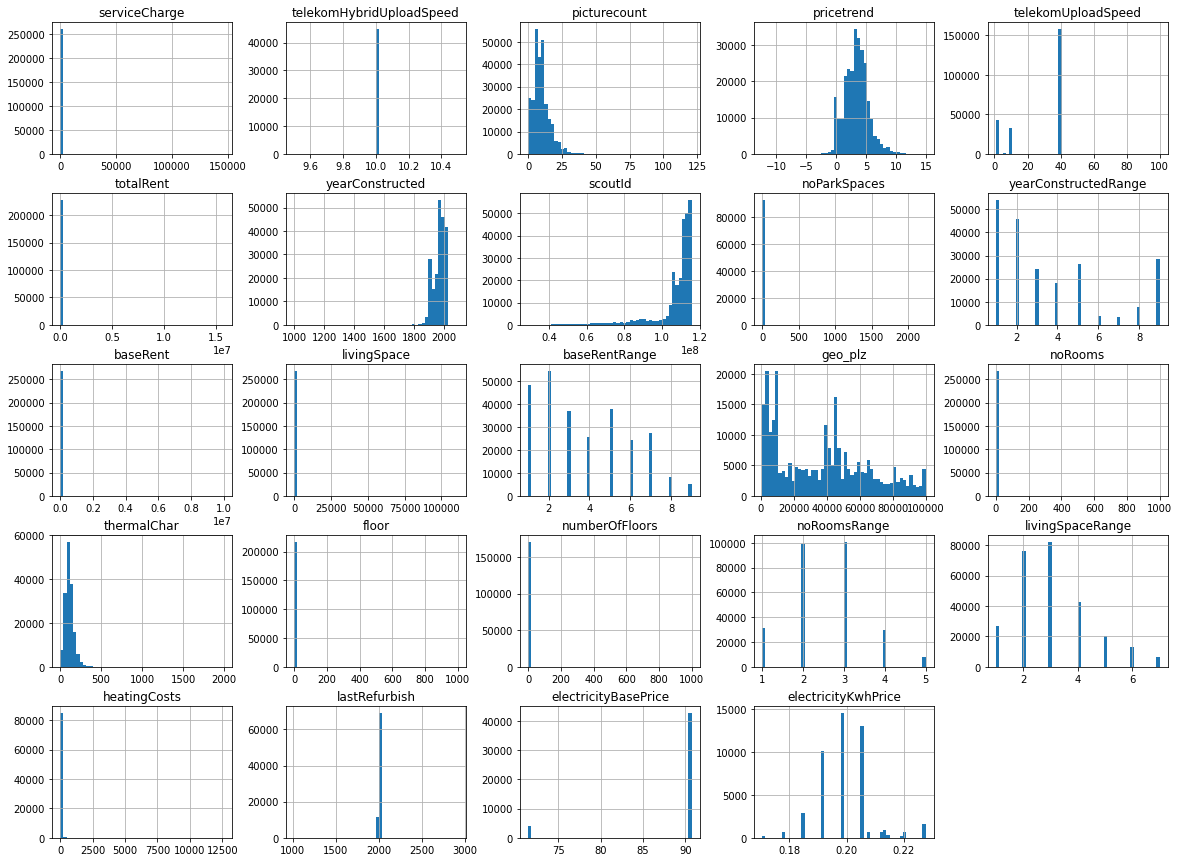

In [191]:
immo_data.hist(bins=50, figsize=(20,15))
plt.show()

In [192]:
Rcorr_matrix = immo_data.corr()
Rcr = Rcorr_matrix['serviceCharge'].copy()
Rcr

serviceCharge               1.000000
telekomHybridUploadSpeed         NaN
newlyConst                  0.047680
balcony                     0.060859
picturecount                0.061569
pricetrend                  0.063738
telekomUploadSpeed          0.010687
totalRent                   0.003954
yearConstructed             0.032162
scoutId                     0.015431
noParkSpaces                0.005239
hasKitchen                  0.039271
cellar                      0.019692
yearConstructedRange        0.064502
baseRent                    0.236240
livingSpace                 0.076134
lift                        0.074333
baseRentRange               0.170721
geo_plz                     0.038231
noRooms                     0.051044
thermalChar                -0.019583
floor                       0.002058
numberOfFloors              0.007053
noRoomsRange                0.135221
garden                      0.013835
livingSpaceRange            0.188643
heatingCosts                0.059051
l

In [193]:
regg = immo_data[['serviceCharge','baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend',
                  'geo_plz', 'thermalChar']].copy()

In [194]:
regg = regg.dropna()

In [195]:
train_set_reg, test_set_reg = train_test_split(regg, test_size = 0.2, random_state = 42)

In [196]:
from sklearn.linear_model import Ridge

In [197]:
clf = Ridge(alpha=1.0)

In [202]:
clf.fit(train_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], train_set_reg[['serviceCharge']])

Ridge()

In [203]:
clf.score(test_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], test_set_reg[['serviceCharge']])

0.004482556693194417

### lasso

<div dir=rtl>
<font face="B Nazanin">

رگرسیون lasso نوعی رگرسیون خطی است که از انقباض استفاده می کند. انقباض جایی است که مقادیر داده ها به سمت یک نقطه مرکزی کوچک می شوند، مانند میانگین. روش lasso مدل‌های ساده و پراکنده را تشویق می‌کند (یعنی مدل‌هایی با پارامترهای کمتر)

In [206]:
from sklearn.linear_model import Lasso
laso = Lasso(alpha=1)

In [207]:
laso.fit(train_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], train_set_reg[['serviceCharge']])

Lasso(alpha=1)

In [208]:
laso.score(test_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], test_set_reg[['serviceCharge']])

0.004479013929949427